In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Laboratorio 02: Representación Numérica, Errores y Estabilidad.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Juan Sebastian Novoa Ortiz
*Métodos computacionales 2025-I*

---

# 1.
Cree una función llamada `myint` pero que a partir de un número binario con base de 16 bits encuentre el entero correspondiente. Compare su resultado con `int(0b1000011100001)`

In [2]:
# funcion myint convierte un binario de 16 bits a entero
# entrada:
#   binario_str: string que representa un numero binario de 16 bits
# salida:
#   entero: entero correspondiente al valor binario
def myint(binario_str):
    # verificar que la longitud sea exactamente 16 bits
    if len(binario_str) != 16:
        raise ValueError("el numero binario debe tener 16 bits")
    # convertir a entero usando base 2
    entero = int(binario_str, 2)
    return entero

# -- ejemplo de uso sin emplear main() ni bloque especial --

# numero binario original (13 bits) que queremos convertir
raw_binary = '1000011100001'

# rellenar con ceros a la izquierda para obtener un string de 16 bits
padded_binary = raw_binary.zfill(16)

# calcular el entero usando nuestra funcion myint
resultado_myint = myint(padded_binary)

# calcular el entero con la funcion incorporada int y un literal binario
resultado_builtin = int(0b1000011100001)

# mostrar los resultados en consola
print("binario (16 bits):", padded_binary)
print("resultado myint:   ", resultado_myint)
print("resultado builtin: ", resultado_builtin)


binario (16 bits): 0001000011100001
resultado myint:    4321
resultado builtin:  4321


# 2.
Generar una función llamada `number64` para flotantes de precisión doble (64bits) donde a partir de un número binario encuentre el valor real. Compruebe su solución usando

```
number64("0100000000111011100100001111111111111111111111111111111111111111")
```

In [3]:
# funcion number64 convierte un string binario de 64 bits
# en un valor real de precision doble (float64)
# entrada:
#   binario_str: string con exactamente 64 caracteres '0' o '1'
# salida:
#   numero_real: numero float de doble precision correspondiente
def number64(binario_str):
    # verificar longitud de 64 bits
    if len(binario_str) != 64:
        raise ValueError("el numero binario debe tener 64 bits")
    # convertir el string binario a entero
    entero = int(binario_str, 2)
    # crear un arreglo numpy con tipo uint64 usando ese entero
    arr_bits = np.array([entero], dtype=np.uint64)
    # reinterpretar los mismos bits como float64
    numero_real = arr_bits.view(np.float64)[0]
    return numero_real

# ejemplo de uso sin bloque main()
binario_prueba = (
    "0100000000111011100100001111111111111111111111111111111111111111"
)
valor_convertido = number64(binario_prueba)

print("binario      :", binario_prueba)
print("valor float64:", valor_convertido)


binario      : 0100000000111011100100001111111111111111111111111111111111111111
valor float64: 27.566406249999996


# 3. Aproximación de $\pi$

La serie de Maclaurin para la función tangente inversa converge en $-1 < x \leq 1$ y está dada por:

$$
\arctan x = \lim_{n \to \infty} P_n(x) = \lim_{n \to \infty} \sum_{i=1}^n (-1)^{i+1} \frac{x^{2i-1}}{2i-1}
$$

- **Aproximación básica**
    - Utilizando el hecho de que $\tan(\pi/4) = 1$, implemente en Python una función que calcule $4P_n(1)$ y determina el número mínimo de términos $n$ necesarios para que $|4P_n(1) - \pi| < 10^{-3}$. Compare su resultado con el valor de $\pi$ de la librería math.
    - Requiriendo que el valor de $\pi$ esté dentro de un error de $10^{-4}$. ¿Cuántos términos de la serie se necesitaría sumar para obtener esta precisión? Implemente una solución en Python para encontrar este valor.
- **Mejora de la convergencia**
    El método anterior puede mejorarse significativamente usando la identidad:
    $$
    \frac{\pi}{4} = \arctan\left(\frac{1}{2}\right) + \arctan\left(\frac{1}{3}\right)
    $$
    - Implemente en Python una función que evalúe la serie para $\arctan(1/2)$ y $\arctan(1/3)$ por separado y luego las sume. Determine el número mínimo de términos necesarios para cada serie (pueden ser diferentes) para aproximar $\pi$ con un error menor a $10^{-3}$ y $10^{-6}$.

- **Método de alta precisión**
    Para obtener una convergencia aún más rápida, usamos la identidad:
    $$
    \frac{\pi}{4} = 4\arctan\left(\frac{1}{5}\right) - \arctan\left(\frac{1}{239}\right)
    $$
    Desarrolle un programa en Python que implemente esta fórmula y determine:
    - El número mínimo de términos necesarios en cada serie para aproximar $\pi$ con error menor a $10^{-3}$ y $10^{-6}$.
    - Compare el rendimiento (número de términos requeridos) con los métodos anteriores.
 
 

In [4]:
'''
La serie de Maclaurin para la función tangente inversa converge en -1 < x <= 1
Aproximacion Basica para hallar Pi, teniendo en cuenta que tan(pi/4) = 1
'''

def pi_basica(error_tol=1e-3):
    n = 0
    suma = 0
    x = 1
    while True:
        termino = ((-1)**n) * (x**(2*n+1)) / (2*n+1)
        suma += termino
        pi_aprox = 4 * suma
        error = abs(pi_aprox - np.pi)
        if error < error_tol:
            break
        n += 1
    return n+1, pi_aprox, error

# Ejecucion de codigo para tolerancia de 1e-3 y 1e-4
n, pi_aprox, error = pi_basica(1e-3)
print(f"Básica: n={n}, pi≈{pi_aprox}, error={error:.2e}")

n, pi_aprox, error = pi_basica(1e-4)
print(f"Básica: n={n}, pi≈{pi_aprox}, error={error:.2e}")

Básica: n=1000, pi≈3.140592653839794, error=1.00e-03
Básica: n=10000, pi≈3.1414926535900345, error=1.00e-04


In [5]:
'''
Aproximacion Mejorada para hallar pi usando la suma de dos arctan de 1/2 y de 1/3
'''
def arctan_maclaurin(x, nmax):
    suma = 0
    for n in range(nmax):
        suma += ((-1)**n) * (x**(2*n+1)) / (2*n+1)
    return suma

def pi_mejorada(error_tol=1e-3):
    n = 1
    while True:
        arctan_1_2 = arctan_maclaurin(1/2, n)
        arctan_1_3 = arctan_maclaurin(1/3, n)
        pi_aprox = 4 * (arctan_1_2 + arctan_1_3)
        error = abs(pi_aprox - np.pi)
        if error < error_tol:
            break
        n += 1
    return n, pi_aprox, error

# Ejecucion de codigo para tolerancia de 1e-3 y 1e-6
n, pi_aprox, error = pi_mejorada(1e-3)
print(f"Mejorada: n={n}, pi≈{pi_aprox}, error={error:.2e}")

n, pi_aprox, error = pi_mejorada(1e-6)
print(f"Mejorada: n={n}, pi≈{pi_aprox}, error={error:.2e}")


Mejorada: n=4, pi≈3.1408505617610554, error=7.42e-04
Mejorada: n=9, pi≈3.1415929813345667, error=3.28e-07


In [6]:
'''
Aproximacion Mejorada para hallar pi usando la suma de dos arctan de 1/5 y de 1/239
'''
def arctan_maclaurin(x, nmax):
    suma = 0
    for n in range(nmax):
        suma += ((-1)**n) * (x**(2*n+1)) / (2*n+1)
    return suma

def pi_machin(error_tol=1e-3):
    n = 1
    while True:
        arctan_1_5 = arctan_maclaurin(1/5, n)
        arctan_1_239 = arctan_maclaurin(1/239, n)
        pi_aprox = 4 * (4 * arctan_1_5 - arctan_1_239)
        error = abs(pi_aprox - np.pi)
        if error < error_tol:
            break
        n += 1
    return n, pi_aprox, error

# Ejecucion de codigo para tolerancia de 1e-3 y 1e-6
n, pi_aprox, error = pi_machin(1e-3)
print(f"Machin: n={n}, pi≈{pi_aprox}, error={error:.2e}")

n, pi_aprox, error = pi_machin(1e-6)
print(f"Machin: n={n}, pi≈{pi_aprox}, error={error:.2e}")


Machin: n=2, pi≈3.1405970293260603, error=9.96e-04
Machin: n=4, pi≈3.1415917721821773, error=8.81e-07


# 4. Serie Exponencial
Considere la serie para $e^{-x}$

$$
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
$$

- Calcula la serie para $x \le 1$ y compárela con la función incorporada `np.exp(x)` (asuma que la función exponencial incorporada es exacta). Elegir un $N$ para el cual el siguiente término en la serie no sea más que $10^{-7}$ de la suma hasta ese punto.

$$
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
$$

- Examine los términos de la serie para $x\approx 10$ y observa las cancelaciones sustractivas significativas que ocurren cuando términos grandes se suman para dar respuestas pequeñas. En particular, imprime la cancelación casi perfecta en $n \approx x − 1$.

- Compruebe si se obtiene una mejor precisión siendo ingenioso y usando $e^{−x} = \frac{1}{e^x}$ para valores grandes de $x$. Esto elimina la cancelación sustractiva, pero no elimina todos los errores de redondeo.


- Incrementando progresivamente $x$ de 1 a 10, y luego de 10 a 100, use el programa para determinar experimentalmente cuándo la serie comienza a perder precisión, y cuándo la serie ya no converge.


- Realice una serie de gráficos del error versus $N$ para diferentes valores de $x$.

Comparacion serie vs np.exp(-x) para x<=1:
 x=0.00  serie=1.0000000000  built-in=1.0000000000  N=0
 x=0.25  serie=0.7788007948  built-in=0.7788007831  N=6
 x=0.50  serie=0.6065306648  built-in=0.6065306597  N=8
 x=0.75  serie=0.4723665382  built-in=0.4723665527  N=9
 x=1.00  serie=0.3678794643  built-in=0.3678794412  N=10

Cancelaciones cerca de n≈x−1 (x=10, n≈9):
 n= 7  termino=-1.984127e+03  suma_parcial=-1.137571e+03
 n= 8  termino= 2.480159e+03  suma_parcial= 1.342587e+03
 n= 9  termino=-2.755732e+03  suma_parcial=-1.413145e+03
 n=10  termino= 2.755732e+03  suma_parcial= 1.342587e+03
 n=11  termino=-2.505211e+03  suma_parcial=-1.162624e+03

Comparacion metodo directo vs mejorado vs builtin para x grandes:
 x= 10  directa=4.539993e-05  mejor=4.539993e-05  builtin=4.539993e-05
 x= 20  directa=5.478103e-10  mejor=2.061154e-09  builtin=2.061154e-09
 x= 50  directa=-7.015777e+03  mejor=1.928750e-22  builtin=1.928750e-22
 x=100  directa=-2.875658e+26  mejor=3.720076e-44  builtin=3.720076

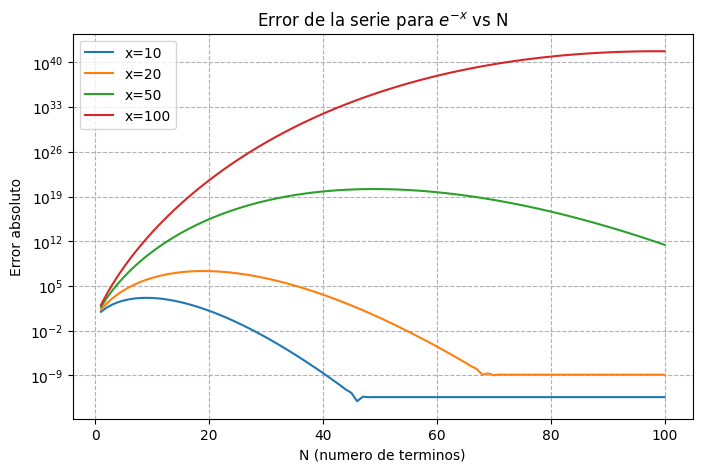

In [7]:
# funcion que calcula e^{-x} mediante la serie hasta que el siguiente termino
# sea <= 1e-7 de la suma actual
# entrada:
#   x: valor donde evaluar e^{-x}
#   tol: tolerancia relativa para el termino siguiente (por defecto 1e-7)
# salida:
#   suma: valor aproximado de e^{-x}
#   N: ultimo indice usado (serie truncada en N)
#   terminos: lista de todos los terminos calculados
#   sumas_parciales: lista con la suma acumulada tras añadir cada termino
def serie_exponencial(x, tol=1e-7):
    suma = 0.0
    terminos = []
    sumas_parciales = []
    n = 0
    while True:
        # termino n de la serie (-1)^n * x^n / n!
        termino = ((-1)**n) * (x**n) / math.factorial(n)
        terminos.append(termino)
        suma += termino
        sumas_parciales.append(suma)
        # calculo del siguiente termino para criterio de parada
        siguiente = ((-1)**(n+1)) * (x**(n+1)) / math.factorial(n+1)
        if abs(siguiente) <= tol * abs(suma):
            break
        n += 1
    return suma, n, terminos, sumas_parciales

# 1) Comparacion para x <= 1 con la funcion incorporada np.exp(-x)
x_vals = np.linspace(0, 1, 5)
print("Comparacion serie vs np.exp(-x) para x<=1:")
for x in x_vals:
    suma, N, _, _ = serie_exponencial(x)
    print(f" x={x:.2f}  serie={suma:.10f}  built-in={np.exp(-x):.10f}  N={N}")

# 2) Cancelaciones sustractivas para x ≈ 10
x0 = 10
suma10, N10, term10, sumas10 = serie_exponencial(x0)
n_cercano = int(x0) - 1
print(f"\nCancelaciones cerca de n≈x−1 (x={x0}, n≈{n_cercano}):")
for i in range(n_cercano-2, n_cercano+3):
    print(f" n={i:2d}  termino={term10[i]: .6e}  suma_parcial={sumas10[i]: .6e}")

# 3) Mejor precision usando e^{-x} = 1/exp(x) para x grandes
def exp_negativo_mejorado(x, umbral=10):
    if x <= umbral:
        return serie_exponencial(x)[0]
    else:
        return 1.0 / np.exp(x)

x_grandes = [10, 20, 50, 100]
print("\nComparacion metodo directo vs mejorado vs builtin para x grandes:")
for x in x_grandes:
    directa = serie_exponencial(x)[0]
    mejor = exp_negativo_mejorado(x)
    builtin = np.exp(-x)
    print(f" x={x:3d}  directa={directa:.6e}  mejor={mejor:.6e}  builtin={builtin:.6e}")

# 4) Perdida de precision y no convergencia al aumentar x
def error_serie(x):
    aprox = serie_exponencial(x)[0]
    return abs(aprox - np.exp(-x))

errores_1_10   = [(x, error_serie(x)) for x in range(1, 11)]
errores_10_100 = [(x, error_serie(x)) for x in range(10, 101, 10)]
print("\nErrores 1≤x≤10:", errores_1_10)
print("Errores 10≤x≤100:", errores_10_100)

# 5) Grafico de error vs N para distintos valores de x
def error_vs_N(x, max_N=100):
    N_vals = list(range(1, max_N+1))
    errores = []
    for N in N_vals:
        # suma parcial de 0 a N
        sumaN = sum(((-1)**n)*(x**n)/math.factorial(n) for n in range(N+1))
        errores.append(abs(sumaN - np.exp(-x)))
    return N_vals, errores

plt.figure(figsize=(8, 5))
for x in x_grandes:
    N_vals, errs = error_vs_N(x, max_N=100)
    plt.plot(N_vals, errs, label=f'x={x}')
plt.yscale('log')
plt.xlabel('N (numero de terminos)')
plt.ylabel('Error absoluto')
plt.title('Error de la serie para $e^{-x}$ vs N')
plt.grid(True, which='both', ls='--')
plt.legend()
plt.show()


# 5.

Supongamos que tenemos una función $f(x)$ y queremos calcular su derivada en un punto $x$. Podemos hacerlo manualmente si conocemos la forma matemática de la función, o podemos hacerlo computacionalmente usando la definición de derivada:

$$
\frac{df}{dx} = \lim_{\delta \to 0} \frac{f(x + \delta) - f(x)}{\delta}.
$$

En el computador no podemos tomar el límite cuando $\delta$ tiende a cero, pero podemos obtener una aproximación razonable usando valores pequeños de $\delta$.

- Escriba un programa que:
    - Defina una función $f(x)$ que retorne el valor $x(x-1)$
    - Calcule la derivada de la función en $x = 1$ usando la fórmula anterior con $\delta = 10^{-2}$
    - Compare este resultado con el valor exacto obtenido analíticamente
    
    Los resultados no coincidirán exactamente. ¿Por qué?
    
- Repita el cálculo para $\delta = 10^{-4}, 10^{-6}, 10^{-8}, 10^{-10}, 10^{-12}$, y $10^{-14}$. Observará que la precisión mejora inicialmente al disminuir $\delta$, pero luego empeora. Explique este comportamiento.


delta    deriv_num     deriv_analitica    error
1e-02    1.0100000000    1.0000000000    1.00e-02
1e-04    1.0001000000    1.0000000000    1.00e-04
1e-06    1.0000009999    1.0000000000    1.00e-06
1e-08    1.0000000039    1.0000000000    3.92e-09
1e-10    1.0000000828    1.0000000000    8.28e-08
1e-12    1.0000889006    1.0000000000    8.89e-05
1e-14    0.9992007222    1.0000000000    7.99e-04


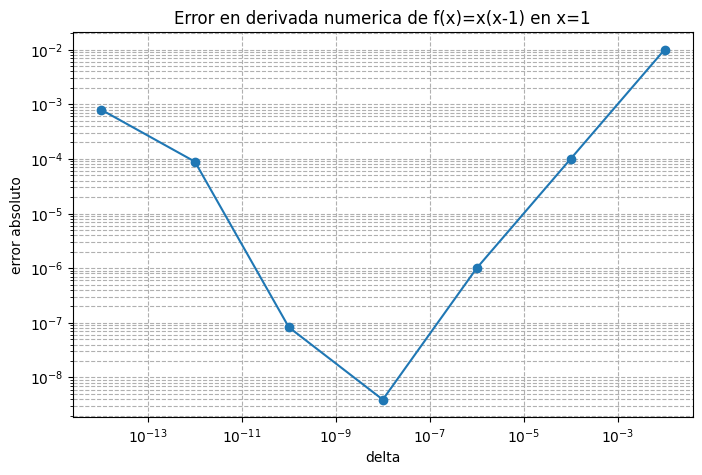

In [8]:
# funcion f(x) = x * (x - 1)
# entrada:
#   x: valor de la variable independiente (float o array)
# salida:
#   valor de f(x)
def f(x):
    return x * (x - 1)

# valor de x donde se calcula la derivada
x_punto = 1.0

# derivada analitica de f en x=1: f'(x)=2x-1 => f'(1)=1
derivada_analitica = 2 * x_punto - 1

# lista de deltas para aproximar la derivada
deltas = [1e-2, 1e-4, 1e-6, 1e-8, 1e-10, 1e-12, 1e-14]

# listas para almacenar resultados
derivadas_numericas = []
errores = []

# calcular derivada numerica y error para cada delta
for delta in deltas:
    derivada_num = (f(x_punto + delta) - f(x_punto)) / delta
    derivadas_numericas.append(derivada_num)
    errores.append(abs(derivada_num - derivada_analitica))

# mostrar comparacion en consola
print("delta    deriv_num     deriv_analitica    error")
for d, dn, err in zip(deltas, derivadas_numericas, errores):
    print(f"{d:.0e}    {dn:.10f}    {derivada_analitica:.10f}    {err:.2e}")

# grafica del error vs delta en escala log-log
plt.figure(figsize=(8,5))
plt.loglog(deltas, errores, marker='o')
plt.xlabel('delta')
plt.ylabel('error absoluto')
plt.title('Error en derivada numerica de f(x)=x(x-1) en x=1')
plt.grid(True, which='both', ls='--')
plt.show()
